### Importing Libraries

In [1]:
%%capture
!pip install tabulate
!pip install pycocotools

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import random
from functools import reduce
import matplotlib.pyplot as plt
from operator import concat
from torchvision import transforms as TR
from torchvision import datasets, transforms
from torch.utils.data import ChainDataset, DataLoader, Sampler
from torch.utils.data.dataset import ConcatDataset
import torchvision
import torch
from tqdm import tqdm
import torch.nn.functional as F
from collections import defaultdict
import yaml
import pandas as pd
import importlib
from utils import *
from Experiment1 import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config_file = 'config.yaml'

with open(config_file) as cf_file:
    config = yaml.safe_load( cf_file.read())

In [4]:
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

In [5]:
# datasets_file = 'data_loaders.'+config['stage_1']['datasets']['combined']
# dataloader_train = importlib.import_module(datasets_file).dataloader_train
# dataloader_val = importlib.import_module(datasets_file).dataloader_val
# dataloader_test = importlib.import_module(datasets_file).dataloader_test

In [6]:
# updated config version
datasets_path = importlib.import_module('data_loaders.'+config['stage_1']['datasets']['combined'])
datasets_class = config['stage_1']['datasets']['combined']
datasets_file = getattr(datasets_path, datasets_class)

dataloader_buffer = datasets_file(config_file)
dataloader_train = dataloader_buffer.getDataloader("train")
dataloader_val = dataloader_buffer.getDataloader("val")
dataloader_test = dataloader_buffer.getDataloader("test")

large IMDb dataset for faces: 270+ images per class
large IMDb dataset for faces: 270+ images per class
large IMDb dataset for faces: 270+ images per class
dataset_combined_train size:30000
dataset_combined_val size:5250
dataset_combined_test size:5250


### Create Model

In [7]:
model = Experiment1(config_file)

### Visualizing examples

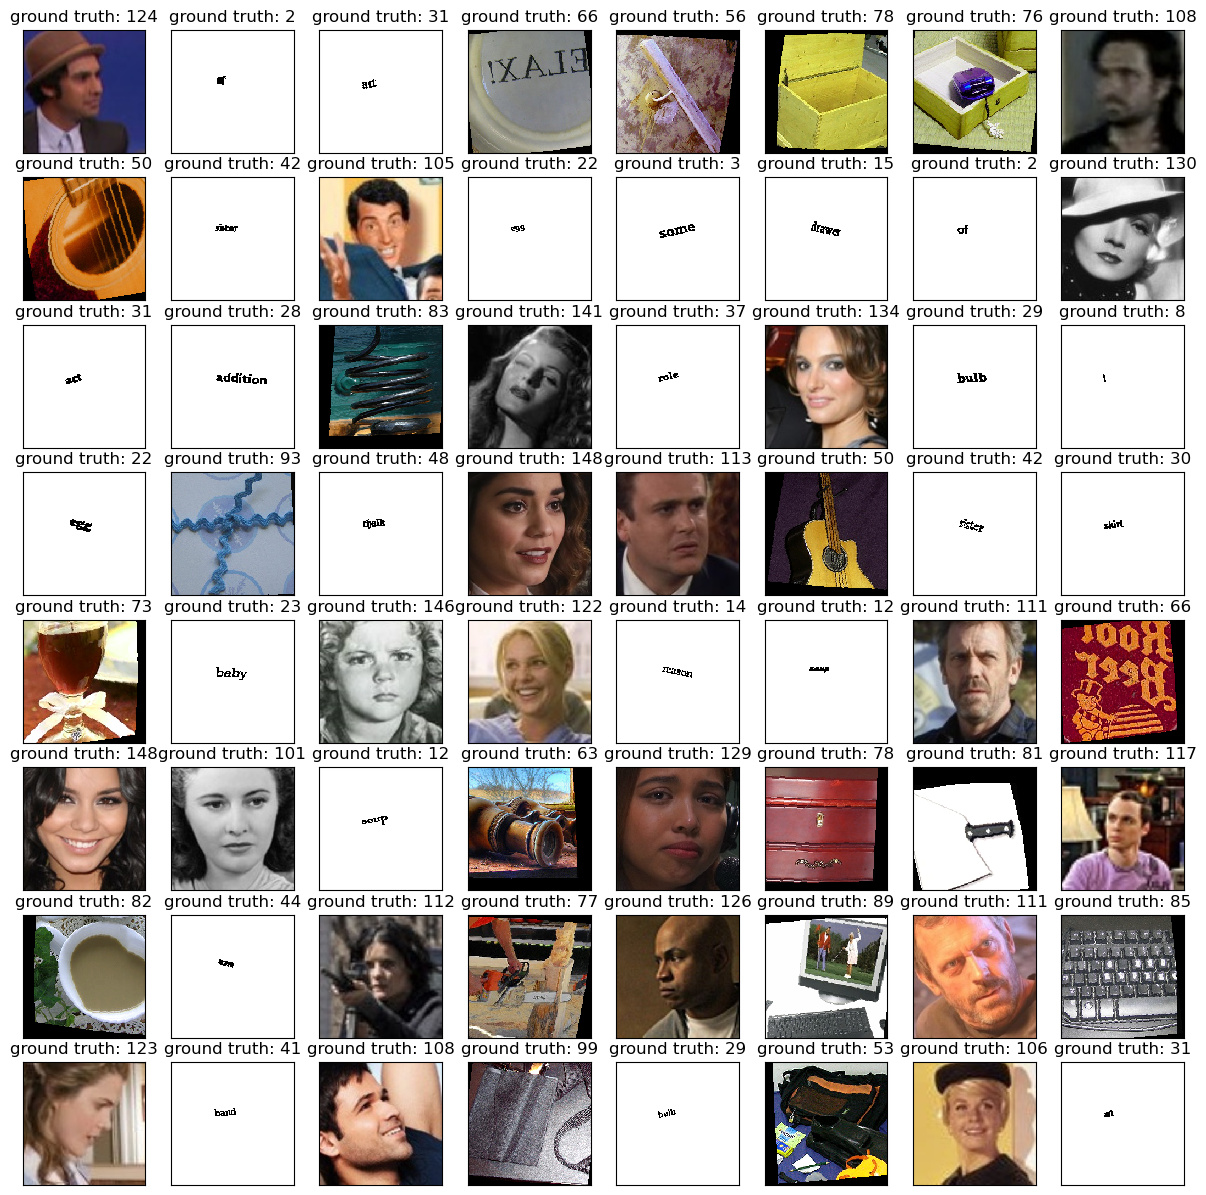

In [8]:
model.visualize_example_batch(dataloader_train,config['stage_1']['batchsize'])

### Training Loop

In [ ]:
model.training(dataloader_train,dataloader_val)

Starting from epoch:  10


  0%|                                                              | 0/41 [00:00<?, ?it/s]

 ------epoch:10------

-------gate layer:1-------
-------  --------------------  ----------------------  ---------------------
Dataset  Gate1                 Gate2                   Gate3
Words    0.001178927846306881  1.2014210325926946e-08  0.9987210704035062
Objects  0.9989387658336767    9.085934781370904e-12   0.0009612441283504685
Faces    0.9969162379801901    0.0012579976629818065   0.0017257744184955015
-------  --------------------  ----------------------  ---------------------
-------gate layer:2-------
-------  -------------------  -------------------  -------------------
Dataset  Gate1                Gate2                Gate3
Words    0.11992959694470745  0.13291250172501332  0.7470579108778518
Objects  0.8733321895150349   0.10451241600338074  0.02205540409516206
Faces    0.23725444422720962  0.6131118788069955   0.1495336868089512
-------  -------------------  -------------------  -------------------
Accuracies - WORDS:0.154100 OBJECTS:0.057400 FACES:0.108700 TOTAL:0.10

  2%|█▏                                               | 1/41 [46:47<31:11:43, 2807.59s/it]



 ------epoch:11------

-------gate layer:1-------
-------  ---------------------  ---------------------  ----------------------
Dataset  Gate1                  Gate2                  Gate3
Words    0.0019338092338957575  0.0003126423436884877  0.9976535598974338
Objects  0.9818014374211412     0.017664386456556633   0.00043418613018258913
Faces    0.8780935965225389     0.12142767272802721    0.00037874121412177764
-------  ---------------------  ---------------------  ----------------------
-------gate layer:2-------
-------  -------------------  --------------------  --------------------
Dataset  Gate1                Gate2                 Gate3
Words    0.11125182755402693  0.012897478342093826  0.8757507057530012
Objects  0.9171288362213925   0.07056521356623356   0.012205960416314245
Faces    0.16850380998034506  0.6834426623430871    0.14795353792238589
-------  -------------------  --------------------  --------------------
Accuracies - WORDS:0.136300 OBJECTS:0.045900 FACES:0.0

  5%|██▎                                            | 2/41 [1:27:13<27:58:59, 2583.05s/it]



 ------epoch:12------

-------gate layer:1-------
-------  ---------------------  ---------------------  ----------------------
Dataset  Gate1                  Gate2                  Gate3
Words    0.0012641974671493384  0.0008298839958196555  0.9978059286483423
Objects  0.8429583295471345     0.1567709533720318     0.00017072727414610663
Faces    0.5084766964095241     0.49114853776482864    0.00027477636971356387
-------  ---------------------  ---------------------  ----------------------
-------gate layer:2-------
-------  -------------------  ---------------------  ---------------------
Dataset  Gate1                Gate2                  Gate3
Words    0.0954661656060271   0.0006147541998229197  0.903819092985063
Objects  0.9563049469781976   0.038607061563578314   0.0049880012604064106
Faces    0.13157363109502823  0.7518478392922127     0.11647853883675371
-------  -------------------  ---------------------  ---------------------
Accuracies - WORDS:0.272500 OBJECTS:0.054500 F

  7%|███▍                                           | 3/41 [2:07:45<26:32:21, 2514.24s/it]



 ------epoch:13------

-------gate layer:1-------
-------  ----------------------  ---------------------  ---------------------
Dataset  Gate1                   Gate2                  Gate3
Words    1.3296713237556433e-16  0.0001046794862513742  0.999795330579776
Objects  0.8081077701637971      0.1917894170064923     2.822970739769918e-06
Faces    0.3230579230840189      0.6768418428044725     2.442585769159612e-07
-------  ----------------------  ---------------------  ---------------------
-------gate layer:2-------
-------  -------------------  ----------------------  --------------------
Dataset  Gate1                Gate2                   Gate3
Words    0.06843733973724428  3.3479928766500833e-06  0.931459324731866
Objects  0.9609370028840167   0.0355419515861261      0.003421054880052736
Faces    0.12921610018414137  0.7564316176079714      0.11425229261325455
-------  -------------------  ----------------------  --------------------
Accuracies - WORDS:0.370600 OBJECTS:0.0688

 10%|████▌                                          | 4/41 [2:49:40<25:50:37, 2514.54s/it]



 ------epoch:14------

-------gate layer:1-------
-------  ---------------------  ---------------------  ----------------------
Dataset  Gate1                  Gate2                  Gate3
Words    6.186029442842316e-05  7.134361031202697e-06  0.9998310153966617
Objects  0.7295608335848306     0.2701371067106971     0.00020206980026828687
Faces    0.26130636983657196    0.7382964870122262     0.0002971532751030275
-------  ---------------------  ---------------------  ----------------------
-------gate layer:2-------
-------  -------------------  ----------------------  ---------------------
Dataset  Gate1                Gate2                   Gate3
Words    0.06294686068018873  2.6263540637843257e-06  0.9369505243691322
Objects  0.9634936913537498   0.03318461210650548     0.0032217075892704726
Faces    0.13224491929684581  0.7562182779775767      0.1114368125393724
-------  -------------------  ----------------------  ---------------------
Accuracies - WORDS:0.428200 OBJECTS:0.081

 12%|█████▋                                         | 5/41 [3:27:42<24:18:23, 2430.65s/it]



 ------epoch:15------

-------gate layer:1-------
-------  ---------------------  ----------------------  ----------------------
Dataset  Gate1                  Gate2                   Gate3
Words    2.235473788911623e-18  0.00010056844817210777  0.9997994416031929
Objects  0.8003078200187239     0.19959176536195206     4.2488582571744727e-07
Faces    0.2547127100882085     0.745009842744819       0.000177457436681969
-------  ---------------------  ----------------------  ----------------------
-------gate layer:2-------
-------  --------------------  ---------------------  --------------------
Dataset  Gate1                 Gate2                  Gate3
Words    0.060822728652663735  5.315959296812422e-05  0.9390241232532807
Objects  0.9674541032706404    0.029560430987074178   0.002885475062934346
Faces    0.13409514072510142   0.7468304124395833     0.11897445716541359
-------  --------------------  ---------------------  --------------------
Accuracies - WORDS:0.457800 OBJECTS:0.

 15%|██████▉                                        | 6/41 [4:08:23<23:39:56, 2434.19s/it]

### Testing Loop

In [ ]:
model.test(dataloader_test)